In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('../data/delays.csv')

# Data preprocessing
df.dropna(inplace=True)
df = df[df['arr_flights'] > 0]  # remove rows where denominator is 0
df['delay_rate'] = df['arr_del15'] / df['arr_flights']
df['high_delay'] = (df['delay_rate'] > 0.25).astype(int)

# Combine year and month into a datetime object for time series analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

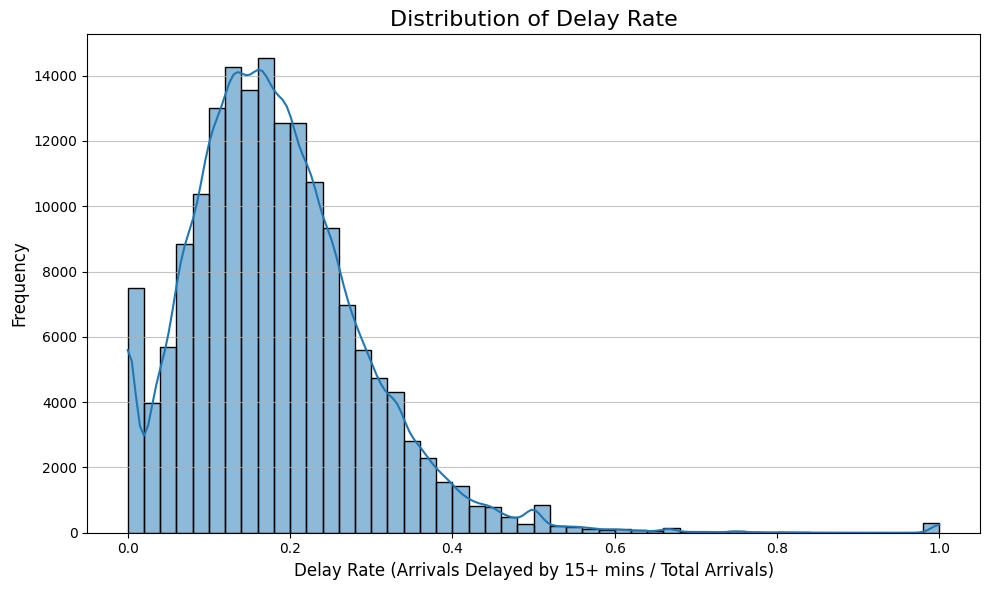

/var/folders/bt/rjbgxmk55n93jrhjj_11_vqm0000gn/T/ipykernel_16333/2316423392.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='month', y='delay_rate', palette='viridis')


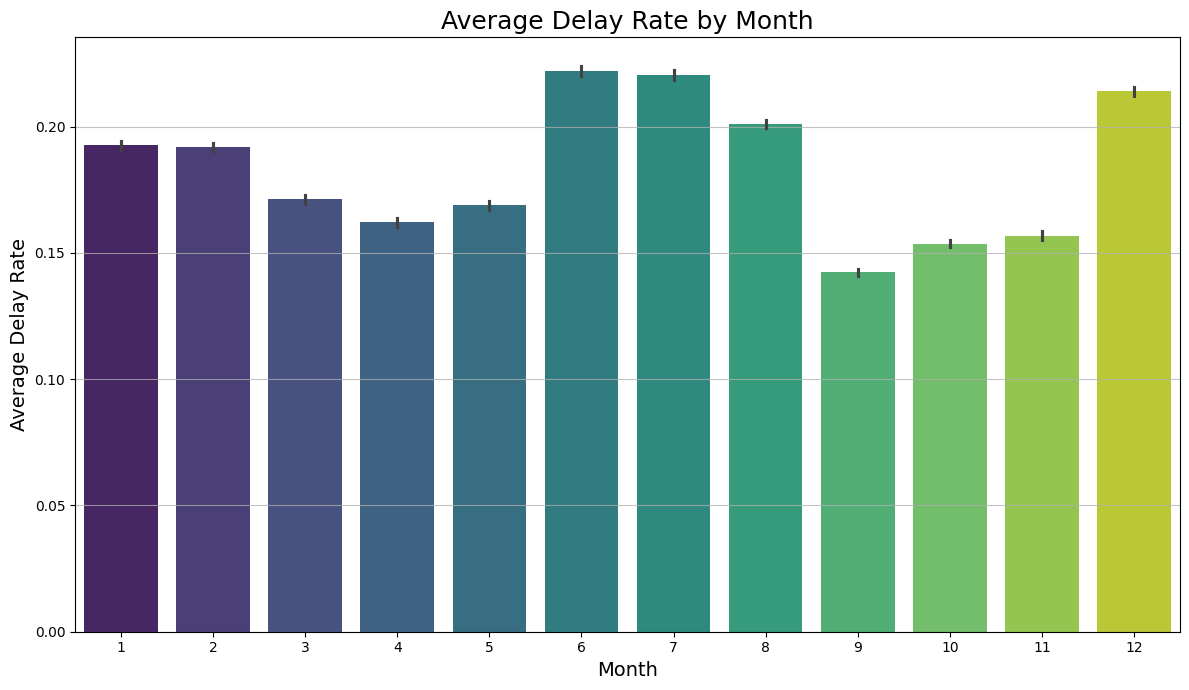

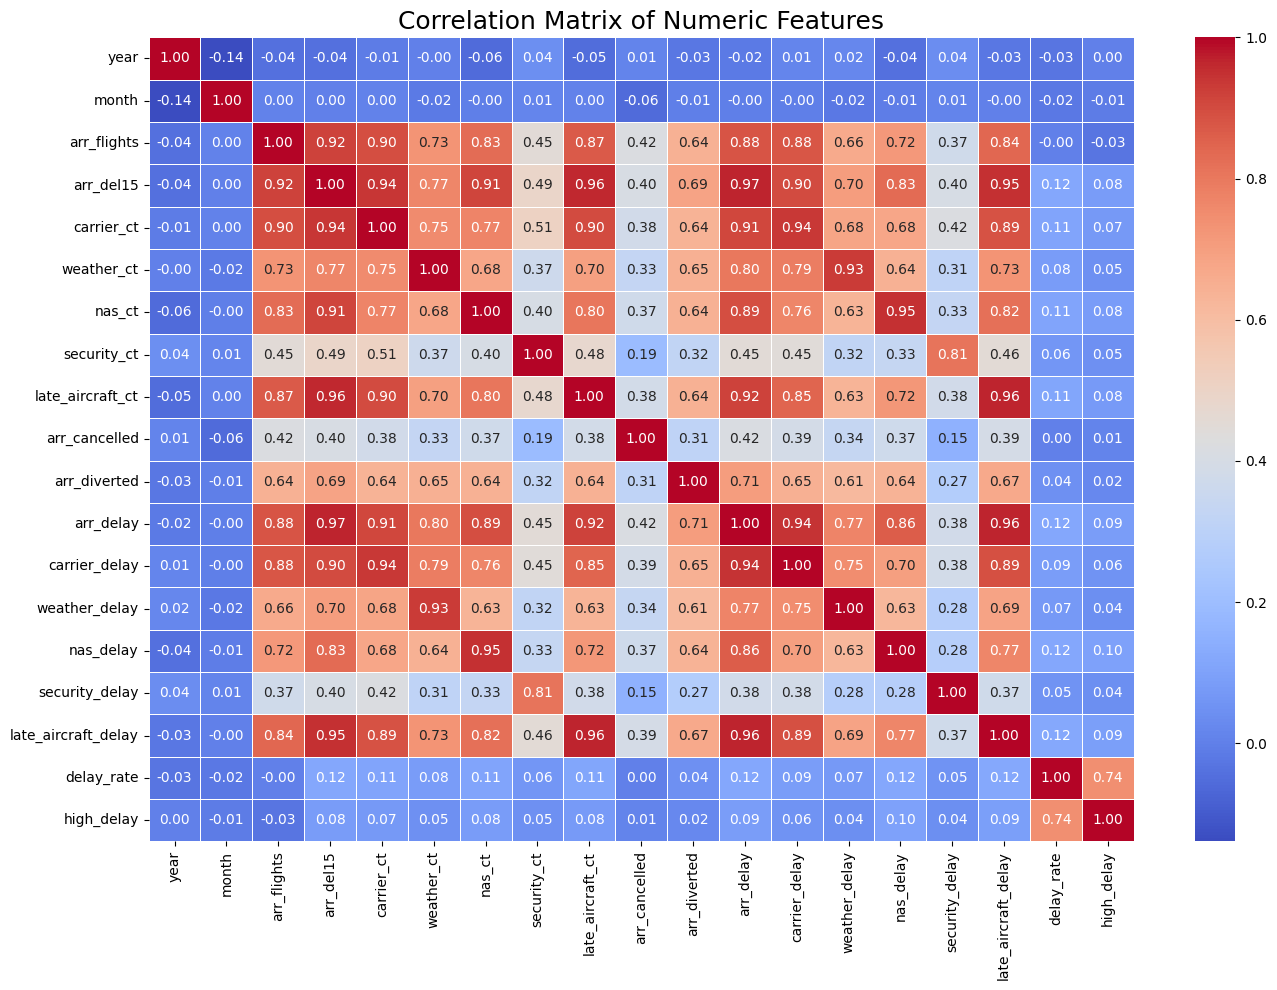

In [ ]:
# 1. Distribution of delay rate
plt.figure(figsize=(10, 6))
sns.histplot(df['delay_rate'], bins=50, kde=True)
plt.title('Distribution of Delay Rate', fontsize=16)
plt.xlabel('Delay Rate (Arrivals Delayed by 15+ mins / Total Arrivals)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 2. Average Delay rate by month
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='month', y='delay_rate', palette='viridis')
plt.title('Average Delay Rate by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Delay Rate', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 3. Correlation between features
plt.figure(figsize=(14, 10))
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=18)
plt.tight_layout()
plt.show()

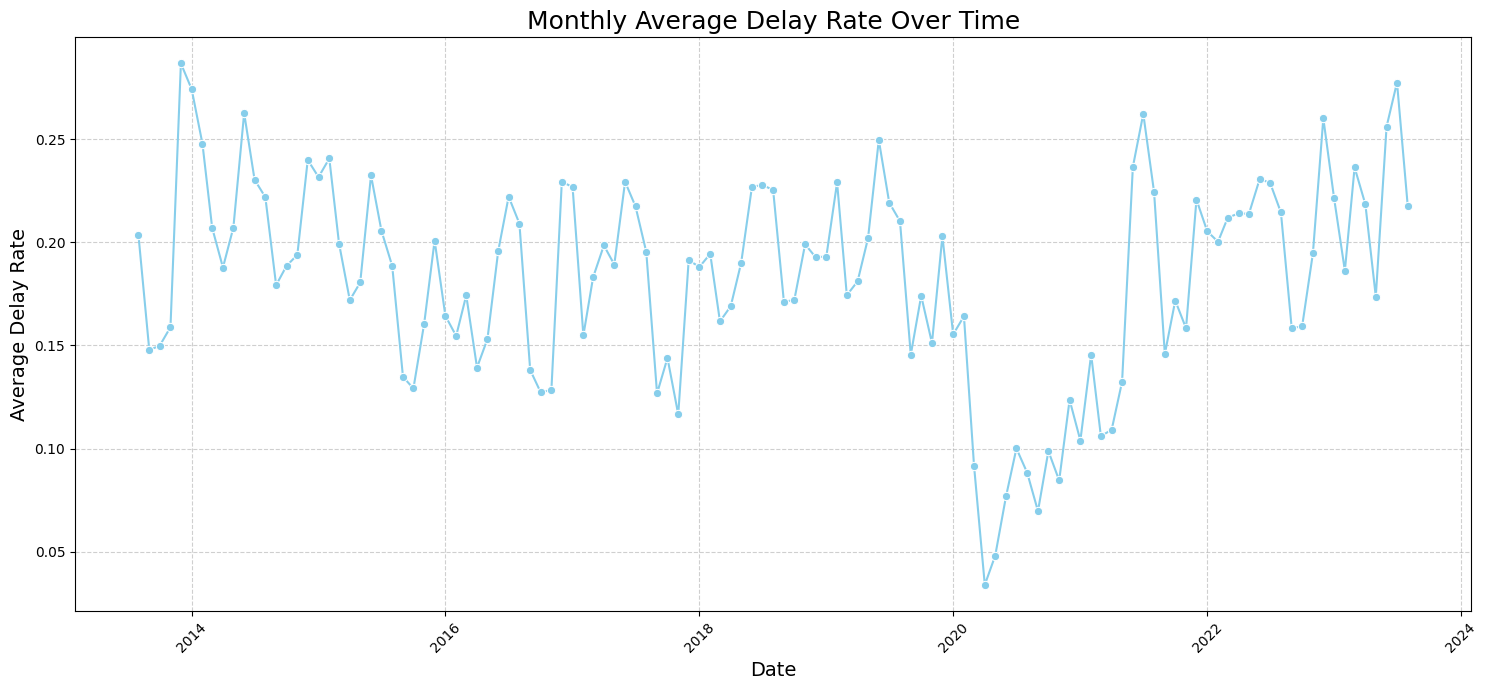

/var/folders/bt/rjbgxmk55n93jrhjj_11_vqm0000gn/T/ipykernel_16333/1091189125.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_airports, x='delay_rate', y='airport_name', palette='magma')


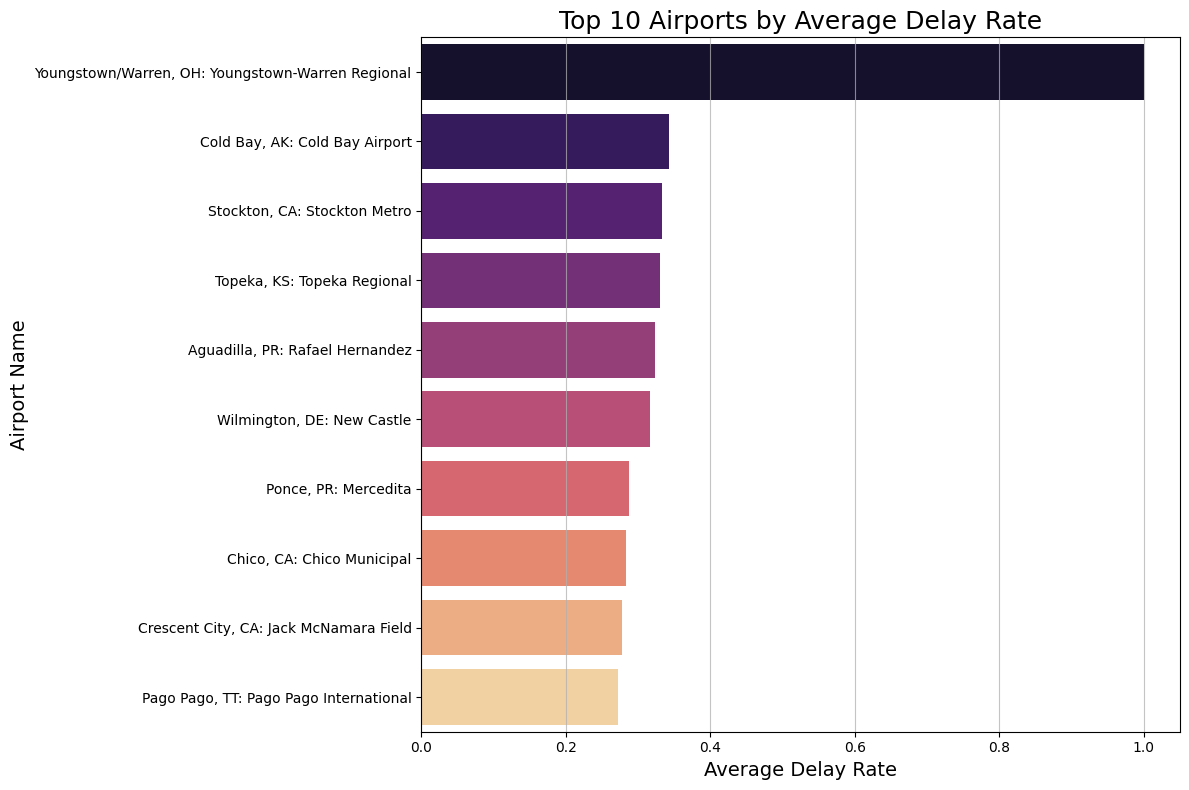

/var/folders/bt/rjbgxmk55n93jrhjj_11_vqm0000gn/T/ipykernel_16333/1091189125.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_carriers, x='delay_rate', y='carrier_name', palette='cividis')


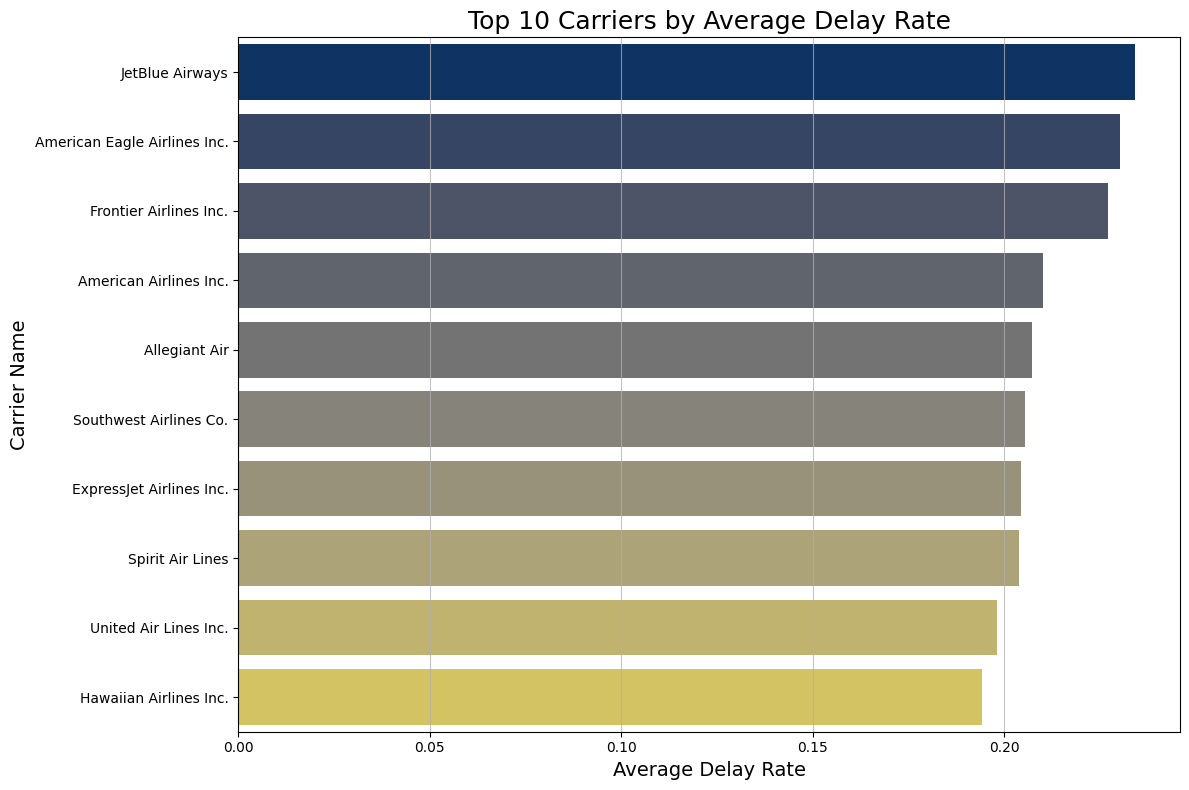

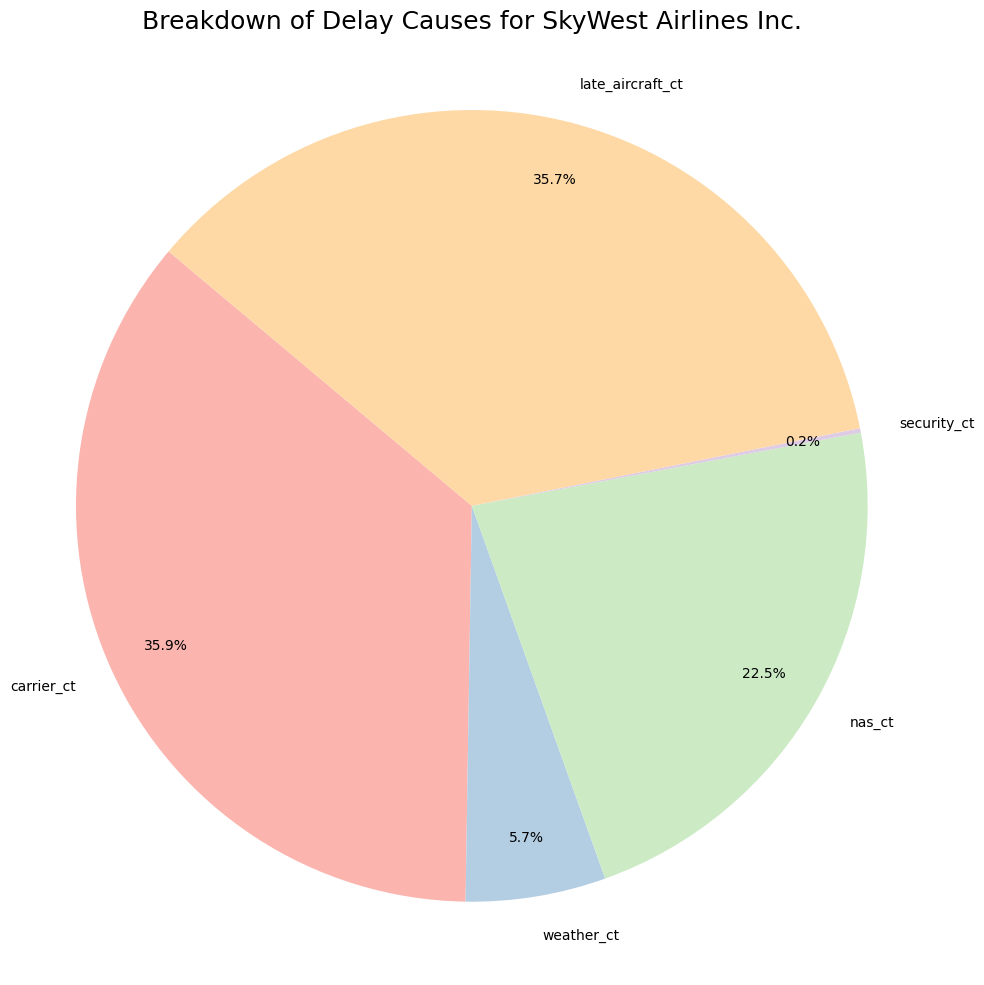

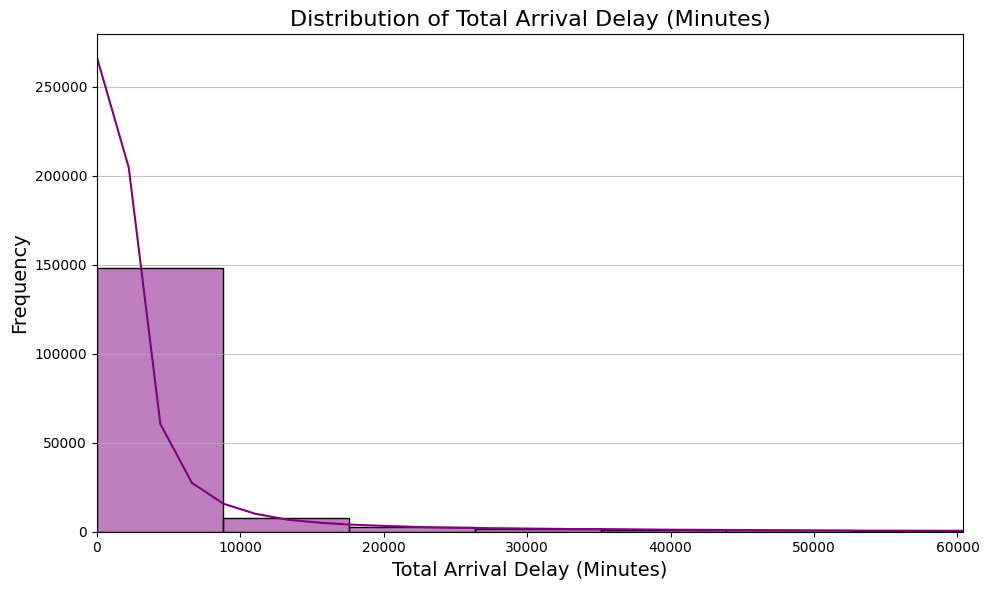

In [ ]:
# 4. Time series analysis: monthly average delay rate over years
# Group by date and calculate mean delay rate
monthly_delay_rate = df.groupby('date')['delay_rate'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_delay_rate, x='date', y='delay_rate', marker='o', color='skyblue')
plt.title('Monthly Average Delay Rate Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Delay Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Top 10 airports by average delay rate
top_10_airports = df.groupby('airport_name')['delay_rate'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_airports, x='delay_rate', y='airport_name', palette='magma')
plt.title('Top 10 Airports by Average Delay Rate', fontsize=18)
plt.xlabel('Average Delay Rate', fontsize=14)
plt.ylabel('Airport Name', fontsize=14)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

# 6. Top 10 carriers by average delay rate
top_10_carriers = df.groupby('carrier_name')['delay_rate'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_carriers, x='delay_rate', y='carrier_name', palette='cividis')
plt.title('Top 10 Carriers by Average Delay Rate', fontsize=18)
plt.xlabel('Average Delay Rate', fontsize=14)
plt.ylabel('Carrier Name', fontsize=14)
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

# 7. Breakdown of delay causes for a specific carrier
# First, find a carrier that appears in the dataset
example_carrier_name = df['carrier_name'].value_counts().index[0] # Pick the most frequent carrier

# Sum up delay counts for the example carrier
carrier_delays = df[df['carrier_name'] == example_carrier_name][[
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct'
]].sum()

# Convert to percentage for a pie chart
total_delay_causes = carrier_delays.sum()
delay_cause_percentages = (carrier_delays / total_delay_causes) * 100

plt.figure(figsize=(10, 10))

# Define a color palette using seaborn, then pass it to 'colors'
colors = sns.color_palette('Pastel1')[0:len(delay_cause_percentages)] # Adjust slice based on number of segments

plt.pie(delay_cause_percentages, labels=delay_cause_percentages.index, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
plt.title(f'Breakdown of Delay Causes for {example_carrier_name}', fontsize=18)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# 8. Distribution of 'arr_delay' (if available and relevant for continuous delay analysis)
# Check if 'arr_delay' has meaningful values (not all zeros after filtering)
if 'arr_delay' in df.columns and df['arr_delay'].sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['arr_delay'][df['arr_delay'] > 0], bins=50, kde=True, color='purple')
    plt.title('Distribution of Total Arrival Delay (Minutes)', fontsize=16)
    plt.xlabel('Total Arrival Delay (Minutes)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    plt.xlim(0, df['arr_delay'].quantile(0.99)) # Limit x-axis to 99th percentile for better visualization
    plt.tight_layout()
    plt.show()